In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

In [25]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

x_train = train.iloc[:,1:].to_numpy()
y_train = train.iloc[:,0].to_numpy()
x_test = test.iloc[:,1:].to_numpy()
y_test = test.iloc[:,0].to_numpy()

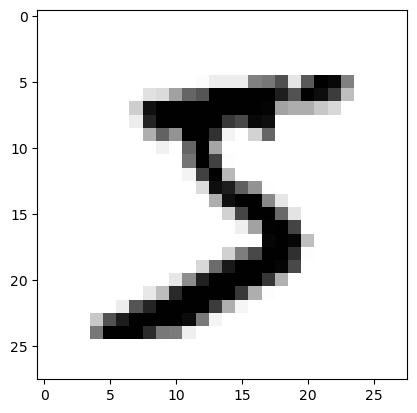

5


In [26]:
plt.imshow(x_train[0].reshape(28,28),cmap='gist_yarg')
plt.show()
print(y_train[0])

In [27]:
x_train = x_train/255.0
x_test = x_test/255.0

In [28]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [30]:
def create_model(layers, nodes, dropout_rate, activation, loss, optimizer):
    model = Sequential()
    model.add(Dense(nodes, activation=activation, input_shape=(784,)))
    for _ in range(layers-1):
        model.add(Dense(nodes, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=128):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, lr_schedule])
    return history

def test_model_accuracy(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model accuracy: {accuracy*100}%")
    return accuracy

def diagnostic(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.tight_layout()
    plt.show()

Model based on different artitectures

In [31]:
print("Training model with simple architecture...")
model1 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer=Adam())
history1 = train_model(model1, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)


print("Training model with complex architecture...")
model2 = create_model(layers=4, nodes=512, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer=Adam())
history2 = train_model(model2, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

Training model with simple architecture...
Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.6477 - accuracy: 0.8119 - val_loss: 0.2766 - val_accuracy: 0.9210 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2547 - accuracy: 0.9243 - val_loss: 0.2049 - val_accuracy: 0.9395 - lr: 0.0011
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1885 - accuracy: 0.9441 - val_loss: 0.1627 - val_accuracy: 0.9525 - lr: 0.0013
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1466 - accuracy: 0.9563 - val_loss: 0.1426 - val_accuracy: 0.9608 - lr: 0.0014
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1153 - accuracy: 0.9651 - val_loss: 0.1087 - val_accuracy: 0.9672 - lr: 0.0016
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0900 - accuracy: 0.9726 - val_loss: 0.0957 - val_accuracy: 0.9687 - lr: 0.0018
Epoch 7/10
422/422 [=======

In [32]:
accuracy1 = test_model_accuracy(model1, x_test, y_test)
accuracy2 = test_model_accuracy(model2, x_test, y_test)


Model accuracy: 97.61999845504761%
Model accuracy: 97.29999899864197%


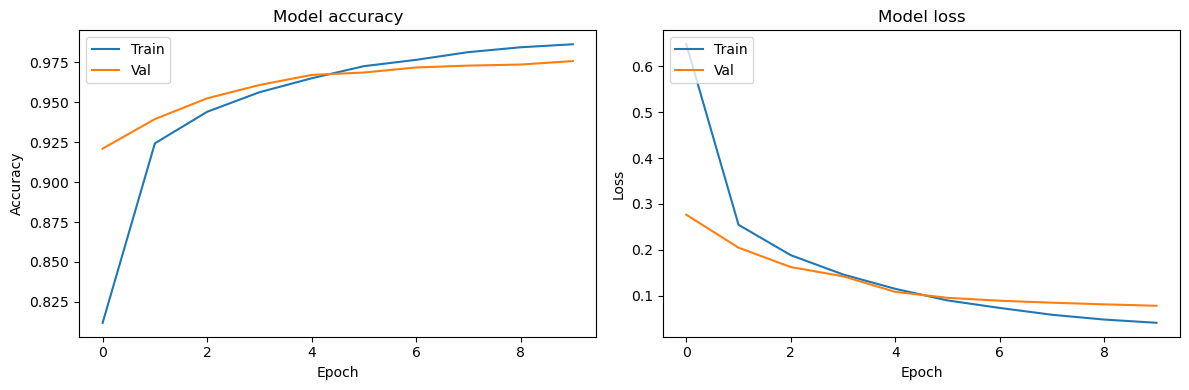

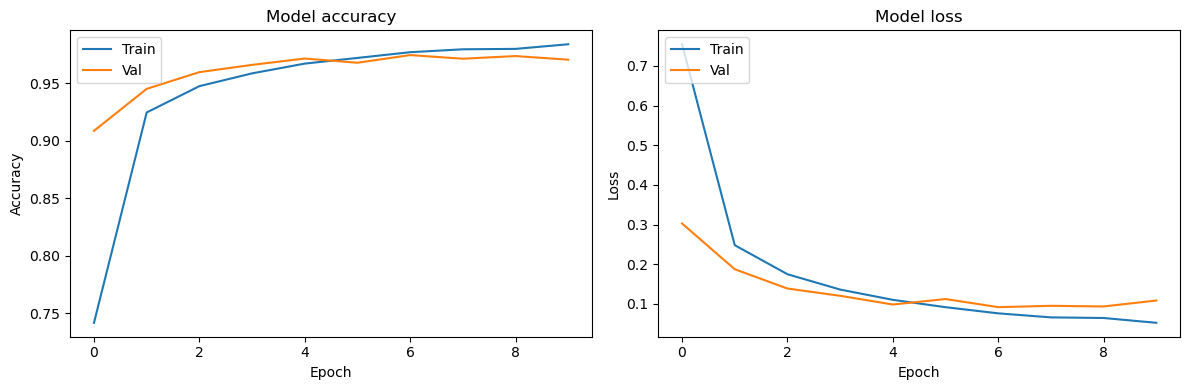

In [33]:
diagnostic(history1)
diagnostic(history2)

Model based on different dropout rates

In [34]:
print("Training model with 0.2 dropout...")
model3 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer='adam')
history3 = train_model(model3, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with 0.5 dropout...")
model4 = create_model(layers=2, nodes=256, dropout_rate=0.5, activation='sigmoid', loss='categorical_crossentropy', optimizer='adam')
history4 = train_model(model4, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with 0.8 dropout...")
model5 = create_model(layers=2, nodes=256, dropout_rate=0.8, activation='sigmoid', loss='categorical_crossentropy', optimizer='adam')
history5  = train_model(model5, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

Training model with 0.2 dropout...
Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.6430 - accuracy: 0.8120 - val_loss: 0.2794 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2491 - accuracy: 0.9258 - val_loss: 0.1980 - val_accuracy: 0.9422 - lr: 0.0011
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.1842 - accuracy: 0.9455 - val_loss: 0.1556 - val_accuracy: 0.9550 - lr: 0.0013
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1414 - accuracy: 0.9570 - val_loss: 0.1239 - val_accuracy: 0.9632 - lr: 0.0014
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.1091 - accuracy: 0.9664 - val_loss: 0.1062 - val_accuracy: 0.9688 - lr: 0.0016
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0843 - accuracy: 0.9744 - val_loss: 0.0884 - val_accuracy: 0.9732 - lr: 0.0018
Epoch 7/10
422/422 [===============

In [35]:
accuracy3 = test_model_accuracy(model3, x_test, y_test)
accuracy4 = test_model_accuracy(model4, x_test, y_test)
accuracy5 = test_model_accuracy(model5, x_test, y_test)


Model accuracy: 97.57000207901001%
Model accuracy: 97.45000004768372%
Model accuracy: 97.36999869346619%


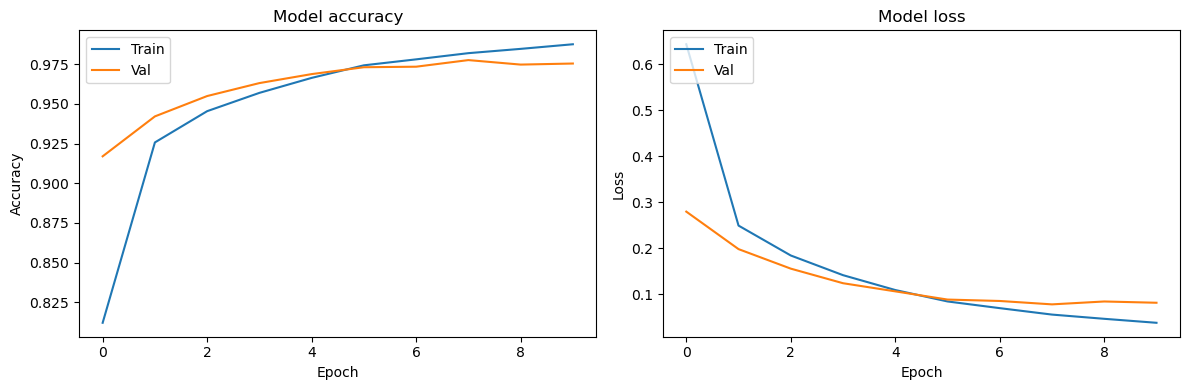

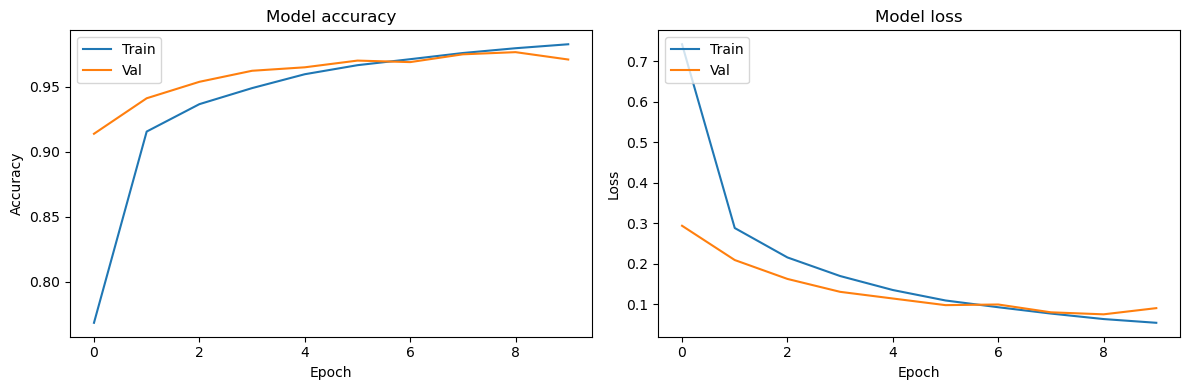

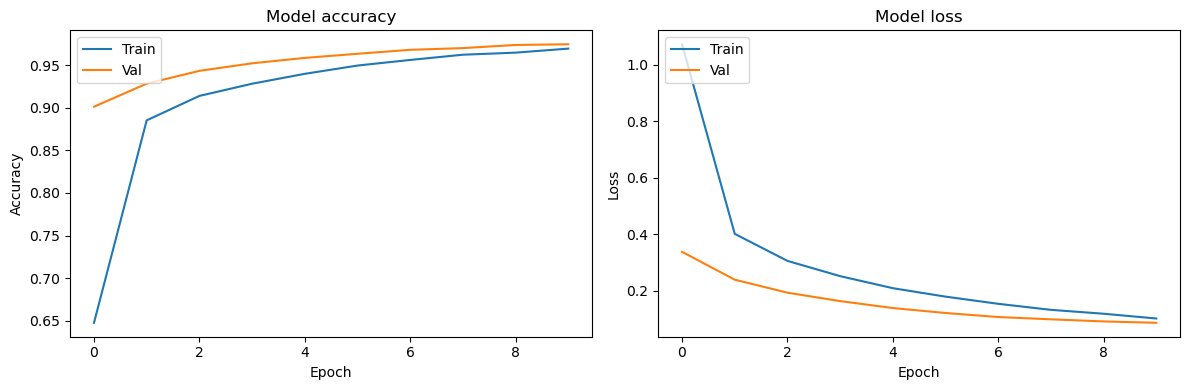

In [36]:
diagnostic(history3)
diagnostic(history4)
diagnostic(history5)

Model with different optimization

In [37]:
print("Training model with Root Mean Square Propagation...")
model6 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer=RMSprop())
history6 = train_model(model6, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with Adaptive Moment Estimation...")
model7 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer=Adam())
history7 = train_model(model7, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with Stochastic Gradient Descent...")
model8 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='relu', loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True))
history8 = train_model(model8, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

Training model with Root Mean Square Propagation...
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6579 - accuracy: 0.8083 - val_loss: 0.2987 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2810 - accuracy: 0.9170 - val_loss: 0.2329 - val_accuracy: 0.9328 - lr: 0.0011
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2162 - accuracy: 0.9347 - val_loss: 0.1750 - val_accuracy: 0.9478 - lr: 0.0013
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1713 - accuracy: 0.9488 - val_loss: 0.1517 - val_accuracy: 0.9568 - lr: 0.0014
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1395 - accuracy: 0.9570 - val_loss: 0.1212 - val_accuracy: 0.9642 - lr: 0.0016
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1145 - accuracy: 0.9650 - val_loss: 0.1158 - val_accuracy: 0.9663 - lr: 0.0018
Epoch 7/10
422/422

In [38]:
accuracy6 = test_model_accuracy(model6, x_test, y_test)
accuracy7 = test_model_accuracy(model7, x_test, y_test)
accuracy8 = test_model_accuracy(model8, x_test, y_test)

Model accuracy: 97.4399983882904%
Model accuracy: 96.97999954223633%
Model accuracy: 94.69000101089478%


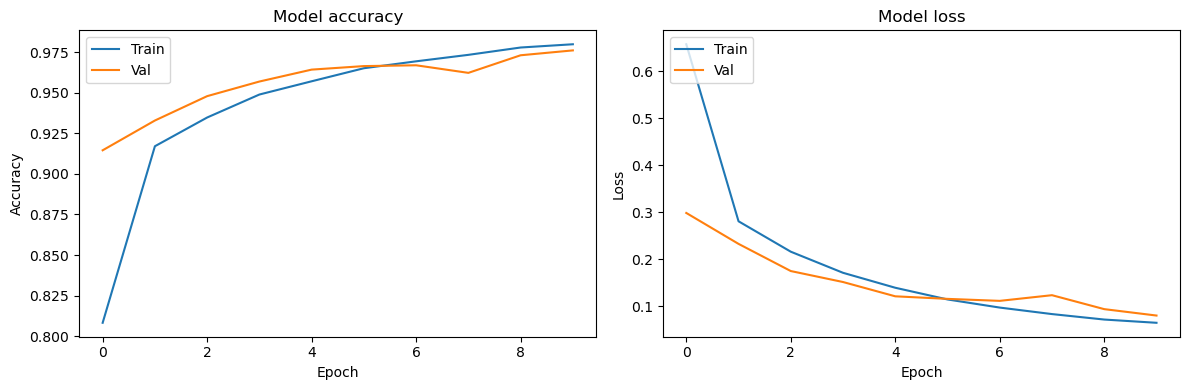

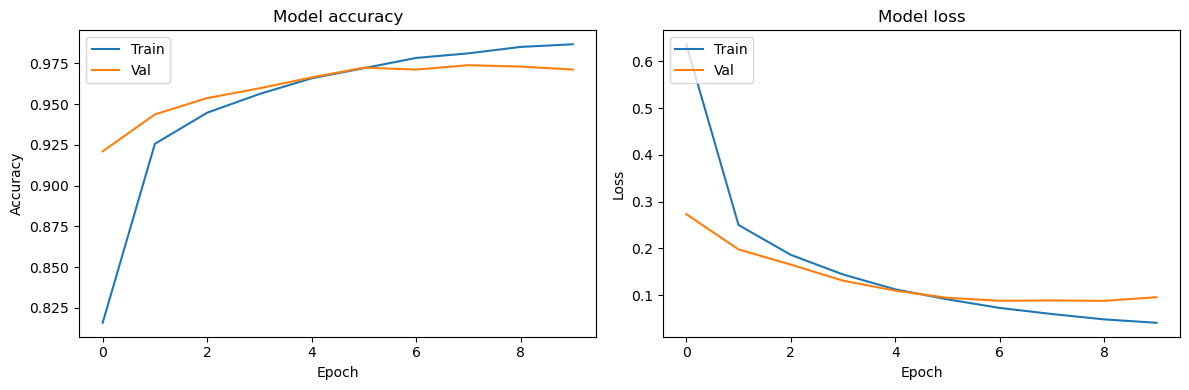

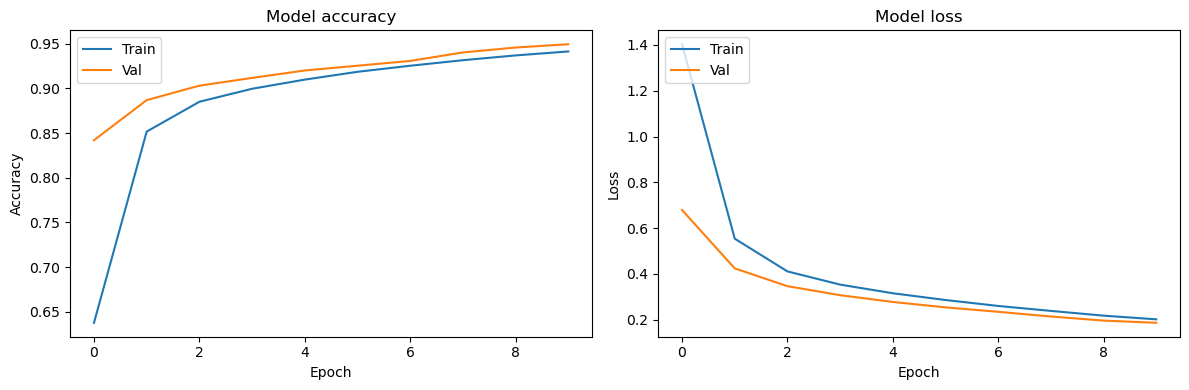

In [39]:
diagnostic(history6)
diagnostic(history7)
diagnostic(history8)

Model with different activation functions

In [40]:
print("Training model with linear activation...")
model9 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='linear', loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True))
history9 = train_model(model9, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with tanh activation...")
model10 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='tanh', loss='categorical_crossentropy', optimizer=Adam())
history10 = train_model(model10, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model leakyrelu activation...")
model11 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation=LeakyReLU(alpha=0.01), loss='categorical_crossentropy', optimizer=Adam())
history11 = train_model(model11, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

Training model with linear activation...
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.8598 - accuracy: 0.7610 - val_loss: 0.4841 - val_accuracy: 0.8663 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.4430 - accuracy: 0.8763 - val_loss: 0.3878 - val_accuracy: 0.8842 - lr: 0.0011
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3815 - accuracy: 0.8906 - val_loss: 0.3508 - val_accuracy: 0.8958 - lr: 0.0013
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3543 - accuracy: 0.8974 - val_loss: 0.3331 - val_accuracy: 0.9027 - lr: 0.0014
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3377 - accuracy: 0.9035 - val_loss: 0.3185 - val_accuracy: 0.9070 - lr: 0.0016
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3260 - accuracy: 0.9068 - val_loss: 0.3090 - val_accuracy: 0.9108 - lr: 0.0018
Epoch 7/10
422/422 [=========

In [41]:
accuracy9 = test_model_accuracy(model9, x_test, y_test)
accuracy10 = test_model_accuracy(model10, x_test, y_test)
accuracy11 = test_model_accuracy(model11, x_test, y_test)

Model accuracy: 92.10000038146973%
Model accuracy: 97.03999757766724%
Model accuracy: 97.46000170707703%


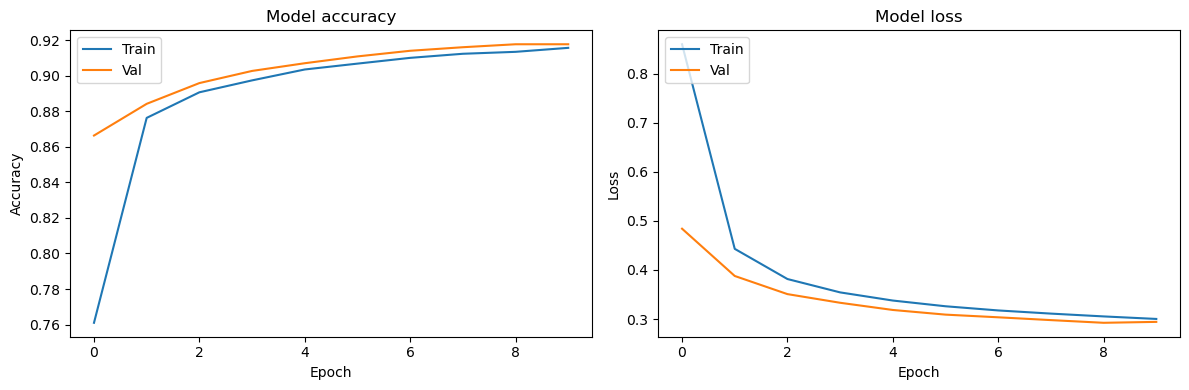

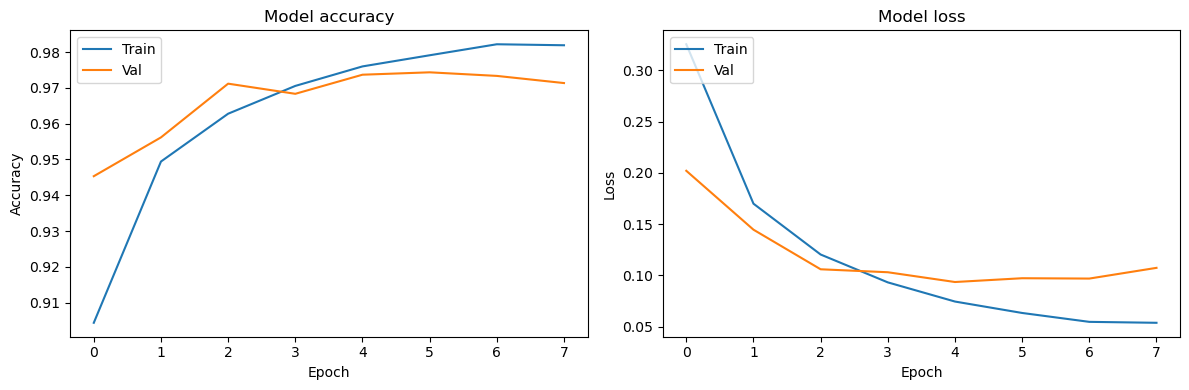

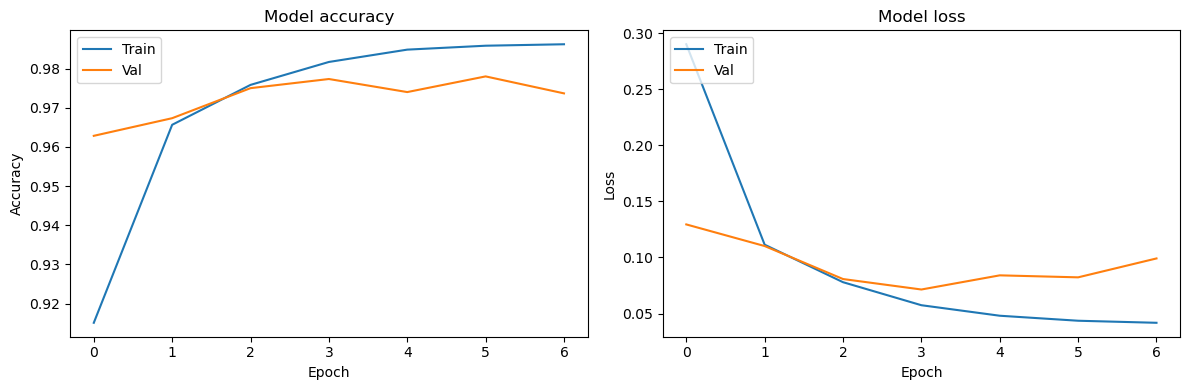

In [42]:
diagnostic(history9)
diagnostic(history10)
diagnostic(history11)

Model with different loss function

In [43]:
y_train_fresh = train.iloc[:,0].to_numpy()
x_train_fresh = train.iloc[:,1:].to_numpy()
y_test_fresh = test.iloc[:,0].to_numpy()
x_test_fresh = test.iloc[:,1:].to_numpy()

x_train_fresh = x_train_fresh/255.0
x_test_fresh = x_test_fresh/255.0

x_train_fresh, x_val_fresh, y_train_fresh, y_val_fresh = train_test_split(x_train_fresh, y_train_fresh, test_size=0.1)

In [44]:
print("Training model with Categorical Cross-entropy loss...")
model12 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='categorical_crossentropy', optimizer=Adam())
history12 = train_model(model12, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

print("Training model with Sparse Categorical Cross-entropy loss...")
model13 = create_model(layers=2, nodes=256, dropout_rate=0.2, activation='sigmoid', loss='sparse_categorical_crossentropy', optimizer=Adam())
history13 = train_model(model13, x_train_fresh, y_train_fresh, x_val_fresh, y_val_fresh, epochs=10, batch_size=128)

Training model with Categorical Cross-entropy loss...
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6435 - accuracy: 0.8101 - val_loss: 0.2788 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2556 - accuracy: 0.9251 - val_loss: 0.2052 - val_accuracy: 0.9395 - lr: 0.0011
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.1892 - accuracy: 0.9436 - val_loss: 0.1559 - val_accuracy: 0.9557 - lr: 0.0013
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1456 - accuracy: 0.9564 - val_loss: 0.1327 - val_accuracy: 0.9617 - lr: 0.0014
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1157 - accuracy: 0.9655 - val_loss: 0.1099 - val_accuracy: 0.9672 - lr: 0.0016
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0912 - accuracy: 0.9725 - val_loss: 0.1009 - val_accuracy: 0.9700 - lr: 0.0018
Epoch 7/10
422/4

In [45]:
accuracy12 = test_model_accuracy(model12, x_test, y_test)
accuracy13 = test_model_accuracy(model13, x_test_fresh, y_test_fresh)

Model accuracy: 97.680002450943%
Model accuracy: 97.7400004863739%


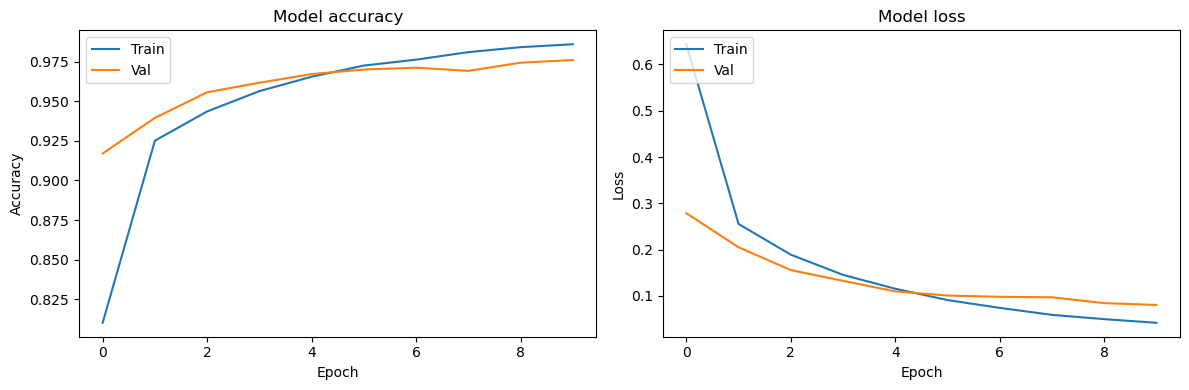

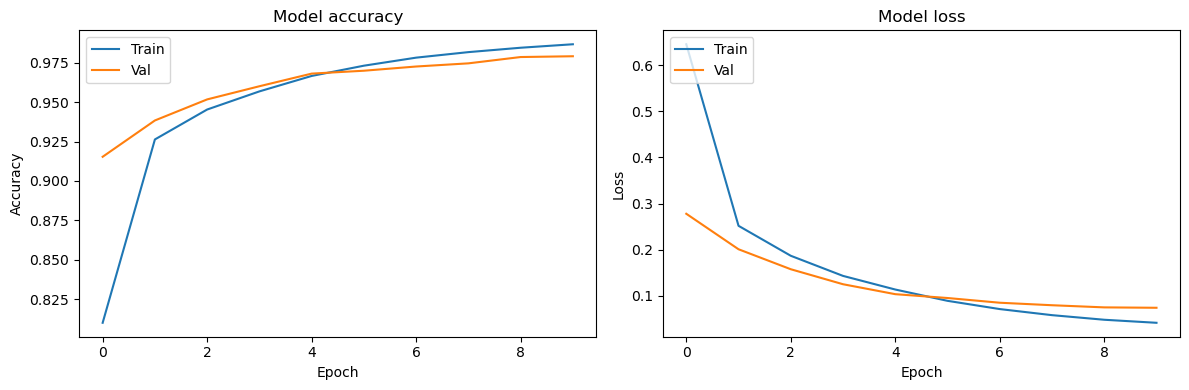

In [47]:
diagnostic(history12)
diagnostic(history13)